In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O
import os
import seaborn as sns # visualization

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

#Tackel warnings while running
import warnings
from collections import Counter
warnings.filterwarnings('ignore')

In [2]:
#Load back-up train set while keep the original train set untouched
train = pd.read_csv("./input/train-1.csv")
train.head()


,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
#Shape of the train set
print("Train shape : ", train.shape)

Train shape :  (595212, 59)


In [4]:
#Load the test set
test = pd.read_csv("./input/test.csv")
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,8,1,0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2,5,1,0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1,3,0,0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1,6,0,0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1,7,0,0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [5]:
#Shape of the train set
print("Test shape : ", test.shape)

Test shape :  (892816, 58)


In [6]:
#Obseveration on Memory Usage
train.info(verbose=False),test.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 59 entries, id to ps_calc_20_bin
dtypes: float64(10), int64(49)
memory usage: 267.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Columns: 58 entries, id to ps_calc_20_bin
dtypes: float64(10), int64(48)
memory usage: 395.1 MB


(None, None)

In [7]:
# statistics of the numerial features
train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ratio of Target: SafeDriver vs Not-A-SafeDriver
0    0.963552
1    0.036448
Name: target, dtype: float64


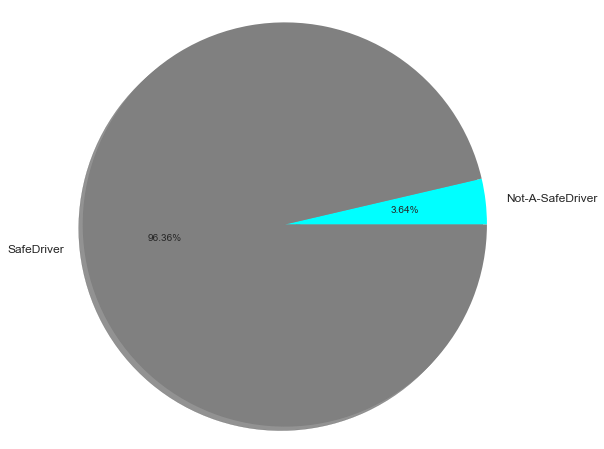

In [8]:
# look at the distribution of our interest: target
ratio_target = train['target'].value_counts()/len(train)
print("Ratio of Target: SafeDriver vs Not-A-SafeDriver")
print(ratio_target)

plt.figure(figsize=(8, 8))
values= [train[train.target==1].shape[0],train[train.target==0].shape[0]]
colors = ['cyan', 'grey']
labels = ['Not-A-SafeDriver', 'SafeDriver']

explode = (0.1, 0)  # explode 1st slice
plt.pie(values, labels=labels, colors=colors, shadow=True, autopct='%.2f%%')
plt.axis('equal')
plt.show()

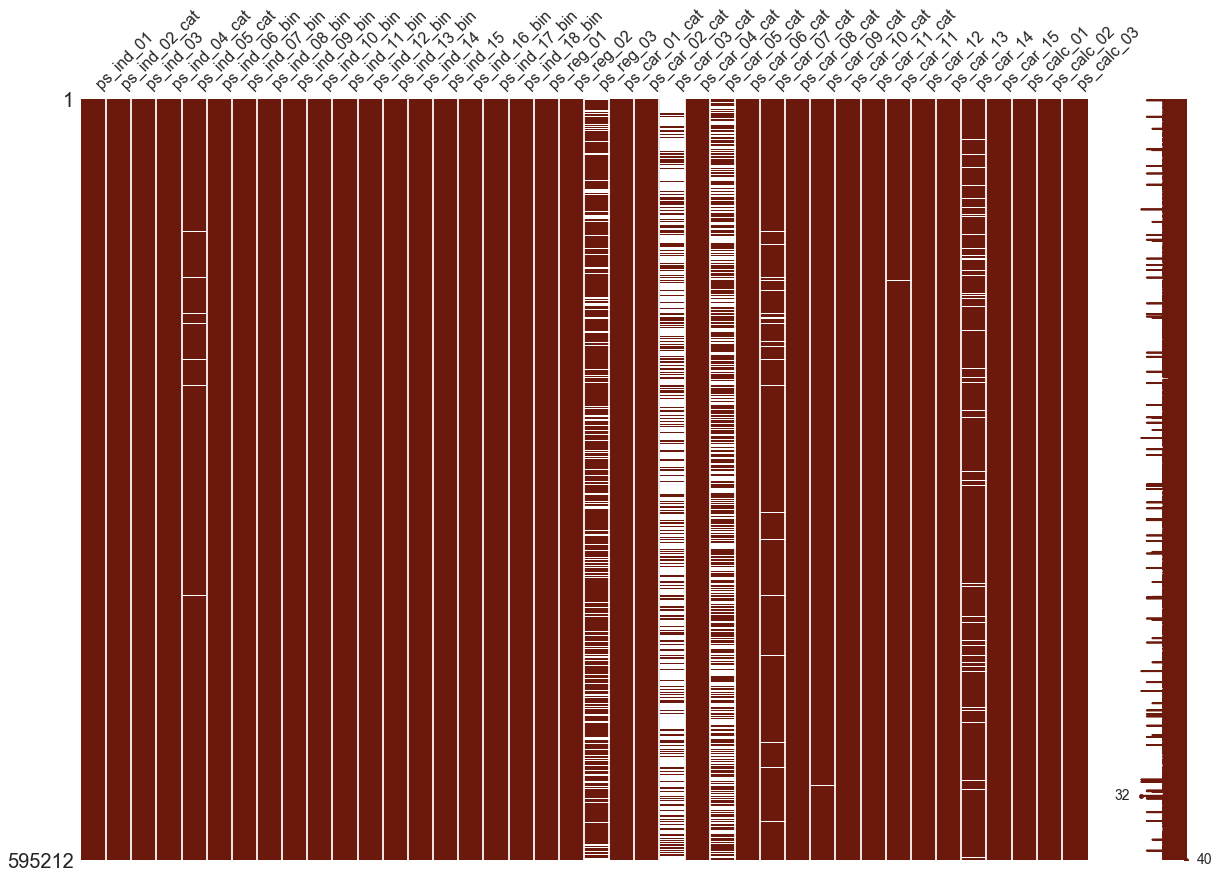

In [9]:
#Use blank/white to visualize all the missing values accross the variables
train_copy = train
train_copy = train_copy.replace(-1, np.NaN)
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=train_copy.iloc[:,2:42], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [10]:
#count the numbers of int64, float64, bool or object/string features
int_features = train.select_dtypes(include = ['int64']).columns.values
float_features = train.select_dtypes(include = ['float64']).columns.values
bool_features= train.select_dtypes(include = ['bool']).columns.values
categorical_features = train.select_dtypes(include = ['object']).columns.values
print('int_features:', int_features)
print('float_features:', float_features)
print('bool_features:', bool_features)
print('categorical_features:', categorical_features)

int_features: ['id' 'target' 'ps_ind_01' 'ps_ind_02_cat' 'ps_ind_03' 'ps_ind_04_cat'
 'ps_ind_05_cat' 'ps_ind_06_bin' 'ps_ind_07_bin' 'ps_ind_08_bin'
 'ps_ind_09_bin' 'ps_ind_10_bin' 'ps_ind_11_bin' 'ps_ind_12_bin'
 'ps_ind_13_bin' 'ps_ind_14' 'ps_ind_15' 'ps_ind_16_bin' 'ps_ind_17_bin'
 'ps_ind_18_bin' 'ps_car_01_cat' 'ps_car_02_cat' 'ps_car_03_cat'
 'ps_car_04_cat' 'ps_car_05_cat' 'ps_car_06_cat' 'ps_car_07_cat'
 'ps_car_08_cat' 'ps_car_09_cat' 'ps_car_10_cat' 'ps_car_11_cat'
 'ps_car_11' 'ps_calc_04' 'ps_calc_05' 'ps_calc_06' 'ps_calc_07'
 'ps_calc_08' 'ps_calc_09' 'ps_calc_10' 'ps_calc_11' 'ps_calc_12'
 'ps_calc_13' 'ps_calc_14' 'ps_calc_15_bin' 'ps_calc_16_bin'
 'ps_calc_17_bin' 'ps_calc_18_bin' 'ps_calc_19_bin' 'ps_calc_20_bin']
float_features: ['ps_reg_01' 'ps_reg_02' 'ps_reg_03' 'ps_car_12' 'ps_car_13' 'ps_car_14'
 'ps_car_15' 'ps_calc_01' 'ps_calc_02' 'ps_calc_03']
bool_features: []
categorical_features: []


Saving figure covariance matrix heatmap


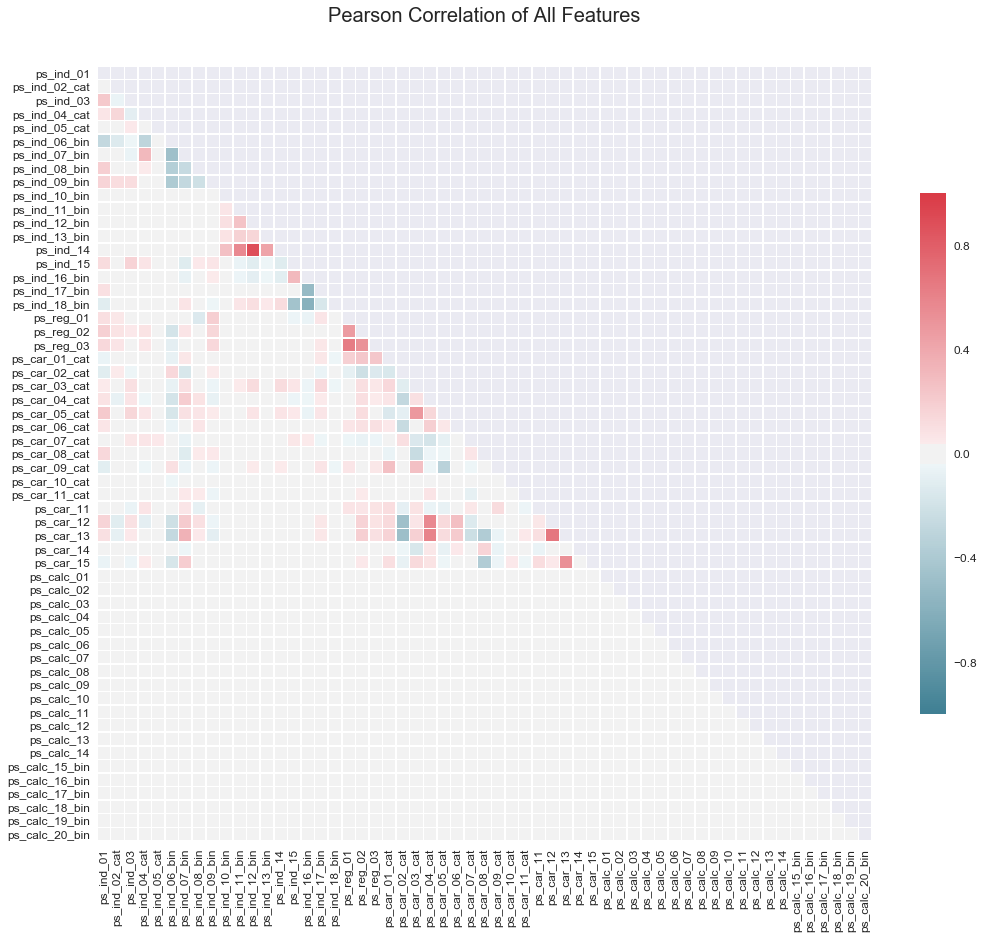

In [11]:
train_copy = train.drop(["id", "target"], axis=1)
train_int_name = train_copy.select_dtypes(include=['int64','float64']).columns.values
corr = train[train_int_name].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


plt.title('Pearson Correlation of All Features', y=1.05, size=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
save_fig("covariance matrix heatmap")

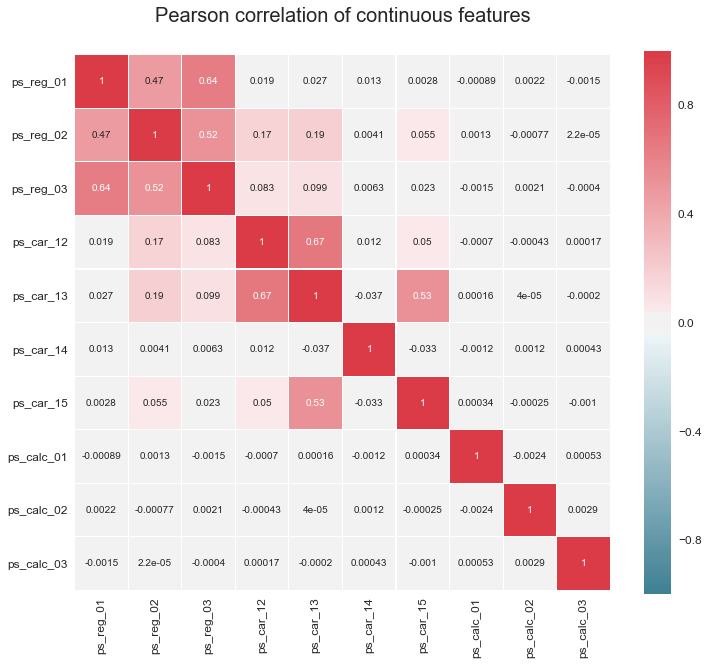

In [12]:
train_float = train.select_dtypes(include=['float64'])
colormap = plt.cm.inferno
plt.figure(figsize=(12,10))
plt.title('Pearson correlation of continuous features', y=1.05, size=20)
sns.heatmap(train_float.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=cmap, linecolor='white', annot=True)

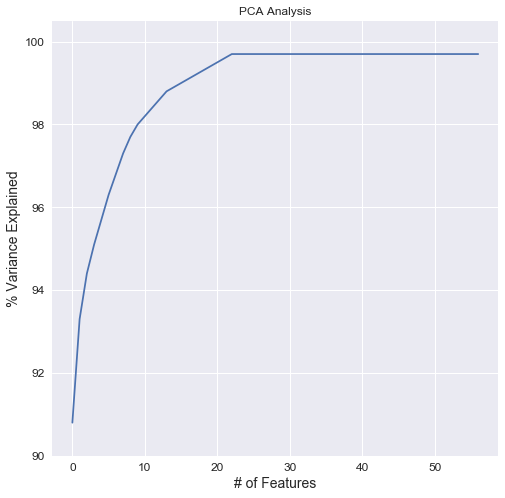

In [13]:
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 57)
X_train=train.drop(["id"], axis=1)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.figure(figsize=(8,8))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(90,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)

In [14]:
var

array([ 90.8,  93.3,  94.4,  95.1,  95.7,  96.3,  96.8,  97.3,  97.7,
        98. ,  98.2,  98.4,  98.6,  98.8,  98.9,  99. ,  99.1,  99.2,
        99.3,  99.4,  99.5,  99.6,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,  99.7,
        99.7,  99.7,  99.7])

# Modeling 101-Start from simple

In [15]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb

train = pd.read_csv("./input/train-1.csv")
X = train.drop(['id','target'], axis=1).values
y = train.target.values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

# Create an XGBoost-compatible metric from Gini

def gini_xgb(preds, dtrain):
    y = dtrain.get_label()
    return 'gini', -gini_normalized(y_test,ypred)

In [19]:
# try simple models 101 without class_weight='balanced'
clfs = {'LogisticRegression':LogisticRegression(class_weight='balanced'),
        #'SVC': SVC(), Not good idea to run svc at this time since the SVC complexity = O(m*n^3)
              'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 2),
              'GaussianNB': GaussianNB(), 'Perceptron': Perceptron(), 
              'LinearSVC': LinearSVC(), 'SGDClassifier': SGDClassifier(), 
              'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
              'XGBoostClassifier': xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
       }

for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    gini_ = gini_normalized(y_test,ypred)
    precision_ = precision_score(ypred, y_test)
    accuracy_ = accuracy_score(ypred,y_test)
    f1_ = f1_score(ypred,y_test)
    print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
          %(name, gini_, precision_, accuracy_, f1_))
print("-----------------------------------------------")

LogisticRegression classifier: gini = 0.1740, precision = 0.5462, accuracy = 0.6235, f1 score = 0.0957
KNeighborsClassifier classifier: gini = 0.0059, precision = 0.0029, accuracy = 0.9623, f1 score = 0.0057
GaussianNB classifier: gini = 0.0635, precision = 0.1252, accuracy = 0.9042, f1 score = 0.0871
Perceptron classifier: gini = 0.0036, precision = 0.0000, accuracy = 0.9635, f1 score = 0.0000
LinearSVC classifier: gini = 0.0036, precision = 0.0000, accuracy = 0.9635, f1 score = 0.0000
SGDClassifier classifier: gini = 0.0049, precision = 0.0033, accuracy = 0.9622, f1 score = 0.0064
DecisionTreeClassifier classifier: gini = 0.0209, precision = 0.0646, accuracy = 0.9187, f1 score = 0.0549
RandomForestClassifier classifier: gini = 0.0036, precision = 0.0000, accuracy = 0.9635, f1 score = 0.0000
XGBoostClassifier classifier: gini = 0.0038, precision = 0.0002, accuracy = 0.9635, f1 score = 0.0004
-----------------------------------------------


In [27]:
# try simple models 101 with class_weight='balanced'
import time
start = time.time()
clfs = {'LogisticRegression':LogisticRegression(class_weight='balanced'),
        #'SVC': SVC(), Not good idea to run svc at this time since the SVC complexity = O(m*n^3)
              'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 3),
              'GaussianNB': GaussianNB(), 'Perceptron': Perceptron(class_weight='balanced'), 
              'LinearSVC': LinearSVC(class_weight='balanced'), 'SGDClassifier': SGDClassifier(class_weight='balanced'), 
              'DecisionTreeClassifier': DecisionTreeClassifier(class_weight='balanced'),
              'RandomForestClassifier': RandomForestClassifier(n_estimators=100,class_weight='balanced'),
              'XGBoostClassifier': xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)}

for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    gini_ = gini_normalized(y_test,ypred)
    precision_ = precision_score(ypred, y_test)
    accuracy_ = accuracy_score(ypred,y_test)
    f1_ = f1_score(ypred,y_test)
    print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
          %(name, gini_, precision_, accuracy_, f1_))

end = time.time()
runningtime = end - start
print('RunningTime=%.3fs'%(runningtime))
print("-----------------------------------------------")

LogisticRegression classifier: gini = 0.1740, precision = 0.5462, accuracy = 0.6235, f1 score = 0.0958
KNeighborsClassifier classifier: gini = 0.0069, precision = 0.0070, accuracy = 0.9601, f1 score = 0.0126
GaussianNB classifier: gini = 0.0635, precision = 0.1252, accuracy = 0.9042, f1 score = 0.0871
Perceptron classifier: gini = 0.0407, precision = 0.0788, accuracy = 0.9257, f1 score = 0.0719
LinearSVC classifier: gini = 0.0036, precision = 0.0000, accuracy = 0.9635, f1 score = 0.0000
SGDClassifier classifier: gini = 0.0598, precision = 0.1103, accuracy = 0.9161, f1 score = 0.0875
DecisionTreeClassifier classifier: gini = 0.0154, precision = 0.0499, accuracy = 0.9282, f1 score = 0.0483
RandomForestClassifier classifier: gini = 0.0036, precision = 0.0000, accuracy = 0.9635, f1 score = 0.0000
XGBoostClassifier classifier: gini = 0.0038, precision = 0.0002, accuracy = 0.9635, f1 score = 0.0004
RunningTime=1283.782s
-----------------------------------------------


In [34]:
#from guo li-Porto_Seguro/Analysis/03_xgb_test
import time
start = time.time()

from sklearn.model_selection import KFold
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=7, 
                    learning_rate=0.05, 
                    n_estimators=1000, 
                    objective='binary:logistic', 
                    nthread=-1, 
                    gamma=0, 
                    colsample_bytree=0.8, 
                    colsample_bylevel=1, 
                    scale_pos_weight=30, 
                    missing=None)

kf = KFold(n_splits=2)
for train_index, test_index in kf.split(X):
    train_X, test_X = X[train_index], X[test_index]
    train_y, test_y = y[train_index], y[test_index]
    xgb.fit(train_X, train_y, 
            eval_set=[(train_X,train_y),(test_X,test_y)], 
            eval_metric=gini_xgb,
            early_stopping_rounds=10)
    
end = time.time()
runningtime = end - start
print('RunningTime=%.3fs'%(runningtime))
print("-----------------------------------------------")

[0]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
Multiple eval metrics have been passed: 'validation_1-gini' will be used for early stopping.

Will train until validation_1-gini hasn't improved in 10 rounds.
[1]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[2]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[3]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[4]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[5]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[6]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[7]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[8]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[9]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
[10]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
Stopping. Best iteration:
[0]	validation_0-gini:-0.003832	validation_1-gini:-0.003832

[0]	validation_0-gini:-0.003832	validation_1-gini:-0.003832
Multiple eval metrics have been p

In [ ]:
# #summarize model score
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               'Decision Tree'],
#     'Score': [acc_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_linear_svc, acc_decision_tree]})
# # models.sort_values(by='Score', ascending=False)